# Coin Detection

## Display coin images

(-0.5, 299.5, 299.5, -0.5)

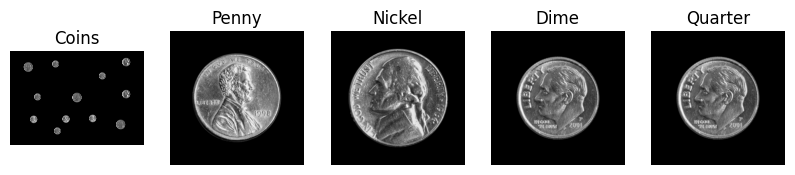

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the images
coins=cv.imread('coins.png',cv.IMREAD_GRAYSCALE)
assert coins is not None
p=cv.imread('Penny.png',cv.IMREAD_GRAYSCALE)
assert p is not None
n=cv.imread('Nickel.png',cv.IMREAD_GRAYSCALE)   
assert n is not None
d=cv.imread('Dime.png',cv.IMREAD_GRAYSCALE)
assert d is not None
q=cv.imread('Quarter.png',cv.IMREAD_GRAYSCALE)
assert q is not None

# Display the images
plt.figure(figsize=(10,10))

plt.subplot(1,5,1)
plt.imshow(coins,cmap='gray')
plt.title('Coins')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(p,cmap='gray')
plt.title('Penny')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(n,cmap='gray')
plt.title('Nickel')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(d,cmap='gray')
plt.title('Dime')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(d,cmap='gray')
plt.title('Quarter')
plt.axis('off')
 

## Match templates

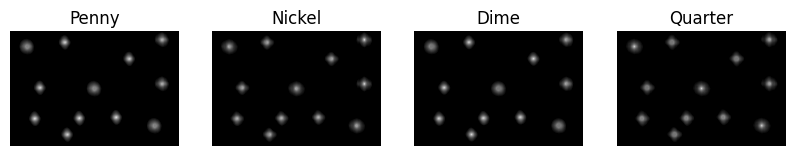

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Match templates
p_resp = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_resp = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

# cv.matchTemplate is used to locate the template image within a larger image.
# cv.TM_CCOEFF_NORMED is a normalized correlation coefficient method.
# The result is normalized and returns values between -1 and 1. Higher values indicate a better match.

# Plot the results
plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(p_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Penny')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(n_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Nickel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(d_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Dime')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(q_resp, cmap='gray', vmin=0, vmax=1)
plt.title('Quarter')
plt.axis('off')

plt.show()

## Identify coin types

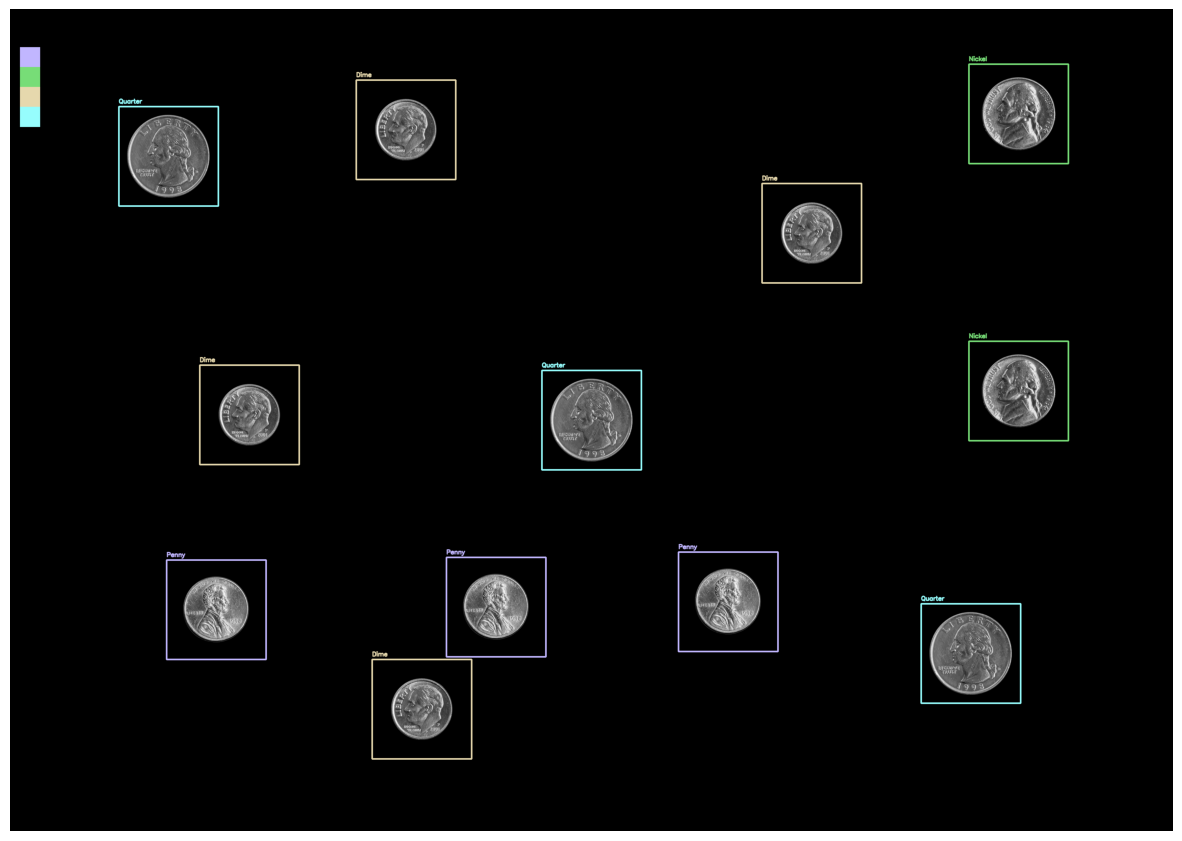

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max

# Read the images
coins=cv.imread('coins.png',cv.IMREAD_GRAYSCALE)
assert coins is not None
p=cv.imread('Penny.png',cv.IMREAD_GRAYSCALE)
assert p is not None
n=cv.imread('Nickel.png',cv.IMREAD_GRAYSCALE)   
assert n is not None
d=cv.imread('Dime.png',cv.IMREAD_GRAYSCALE)
assert d is not None
q=cv.imread('Quarter.png',cv.IMREAD_GRAYSCALE)
assert q is not None

# Match templates
p_resp = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_resp = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

# Define pastel colors
pastel_colors = [
    (255, 182, 193),  # pastel pink
    (119, 221, 119),  # pastel green
    (173, 216, 230),  # pastel blue
    (253, 253, 150)   # pastel yellow
]

# Convert the grayscale image to a BGR color image
coins_color=cv.cvtColor(coins,cv.COLOR_GRAY2BGR)

# Template names and responses
templates = [p, n, d, q]
template_names = ['Penny', 'Nickel', 'Dime', 'Quarter']
responses = [p_resp, n_resp, d_resp, q_resp]

# Dictionary to count the number of each coin
coin_counts = {name: 0 for name in template_names}

# Process each template
for i, (template, response, name) in enumerate(zip(templates, responses, template_names)):
    # Get the height and width of the current template
    h, w = template.shape
    # Find local maxima in the response image for the current template
    coordinates = peak_local_max(response, min_distance=20, threshold_abs=0.9)
    # Count the number of detected coins for the current template type
    coin_counts[name] = len(coordinates)
    
    for coord in coordinates:
        # Draw a rectangle around the detected coin
        cv.rectangle(coins_color, (coord[1], coord[0]), (coord[1] + w, coord[0] + h), pastel_colors[i], 4)
        # Put the coin type name above the rectangle
        cv.putText(coins_color, name, (coord[1], coord[0] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.6, pastel_colors[i], 2, cv.LINE_AA)

# Draw legend
legend_height = 100
legend_width = 100

for i, (name, color) in enumerate(zip(template_names, pastel_colors)):
    # Draw a rectangle as the color legend
    cv.rectangle(coins_color, (30, 115 + 60 * i), (90, 175 + 60 * i), color, -1)
    # Add the name of the coin next to the color legend
    cv.putText(coins_color, name, (100, 150 + 60 * i), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1, cv.LINE_AA)

# Display coins image
plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(coins_color, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display value of coins

In [40]:
# Print the number of each coin in same line
for name, count in coin_counts.items():
    print(f'{name}: {count}')

# Values of each coin in cents
# Penny: 1 cent
# Nickel: 5 cents
# Dime: 10 cents 
# Quarter: 25 cents 

# Calculate the total value of the coins
total_value = 1 * coin_counts['Penny'] + 5 * coin_counts['Nickel'] + 10 * coin_counts['Dime'] + 25 * coin_counts['Quarter']
print(f'Total value: {total_value} cents')
print(f'Total value: ${total_value / 100:.2f}')

Penny: 3
Nickel: 2
Dime: 4
Quarter: 3
Total value: 128 cents
Total value: $1.28
